In [1]:
import os

import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz


In [2]:
# Load data
path = "./churn2.csv"
df = pd.read_csv(path)[["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"]].dropna()
# Take a look at the data
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [3]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
dtype: object

In [4]:
# Transform COLLEGE column to a numeric variable
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,COLLEGE2
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY,0
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY,1
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY,1
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE,0
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY,1


In [5]:
df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('str')
df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('str')
df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('str')

In [6]:
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)
df = df.drop("LEAVE", axis="columns")
df = df.drop("COLLEGE", axis="columns")
df = pd.get_dummies(df)
df.head(5)

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE2,LEAVE2,REPORTED_SATISFACTION_avg,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,31953,0,6,313378,161,0,4,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,36147,0,13,800586,244,0,6,1,1,0,...,0,0,1,0,0,0,1,0,0,0
2,27273,230,0,305049,201,16,15,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,120070,38,33,788235,780,3,2,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,29215,208,85,224784,241,21,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [7]:
# Using all variables

predictor_cols = ['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'COLLEGE2',
       'REPORTED_SATISFACTION_avg', 'REPORTED_SATISFACTION_sat',
       'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat',
       'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_avg',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps']
        
target_col = "LEAVE2"

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols],df[target_col],test_size = 0.25,random_state = 0)

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 23)
X_test shape: (5000, 23)
y_train shape: (15000,)
y_test shape: (5000,)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## Let's define the model (tree)
decision_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy",max_leaf_nodes = 10, min_samples_leaf = 1) 
## Let's tell the model what is the data
decision_tree.fit(X_train, y_train)

scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)

i = 0
for val in scores:
    i = i + 1 
    print("Fold ", i, ":\t", format(val, '.3f'))
    
print("Average error of cross validation score: {:.5f}".format(scores.std() / (len(scores) ** (1/2))))
print("Std. dev of cross validation score: {:.4f}".format(scores.std()))
print("Average cross validation score: {:.4f}".format(scores.mean()))
print("Minimum of cross validation score: {:.4f}".format(scores.min()))

y_pred = decision_tree.predict(X_test)
print("Test set score: {: 4f}".format(np.mean(y_pred == y_test)))



Fold  1 :	 0.680
Fold  2 :	 0.703
Fold  3 :	 0.703
Fold  4 :	 0.678
Fold  5 :	 0.705
Fold  6 :	 0.699
Fold  7 :	 0.702
Fold  8 :	 0.703
Fold  9 :	 0.718
Fold  10 :	 0.718
Average error of cross validation score: 0.00398
Std. dev of cross validation score: 0.0126
Average cross validation score: 0.7009
Minimum of cross validation score: 0.6780
Test set score:  0.703200


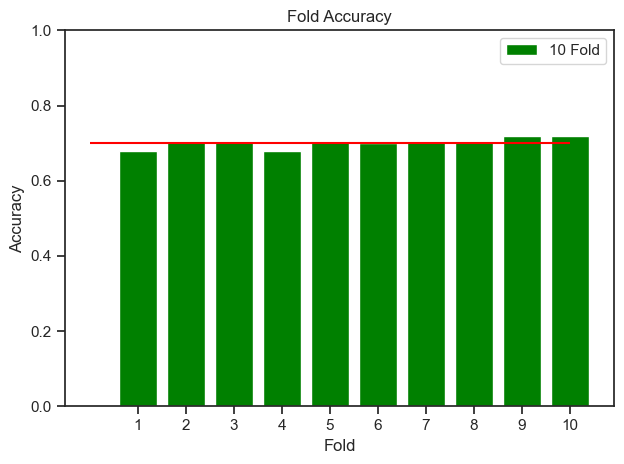

In [10]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 11, 1)

 
plt.bar(parameter_range, scores,
         label="10 Fold", color='g')

plt.plot(scores.mean())
plt.hlines(scores.mean(),xmin=0,xmax=10,colors="red")

# Creating the plot
plt.title("Fold Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.legend(loc='best')
plt.xticks(ticks=parameter_range)
plt.show()

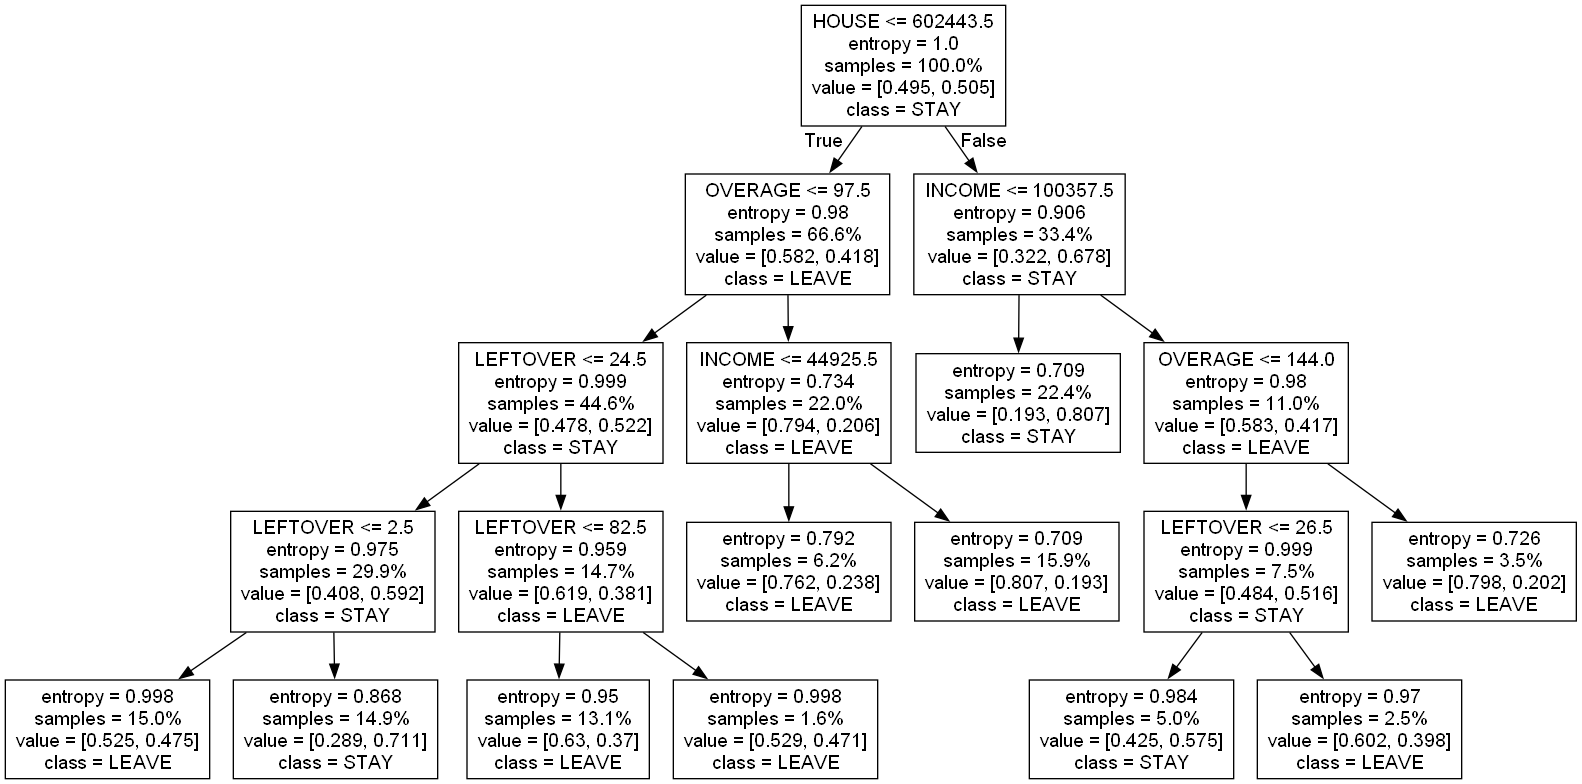

In [11]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from graphviz import Source

def visualize_tree(decision_tree, feature_names, class_names, directory="./images", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    directory1 = directory[2:]
    os.system("mkdir %s" %(directory1))
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,feature_names=feature_names,class_names=class_names,
                               proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s  -o %s" % (dot_name, image_name))
    
    return Image(filename=image_name)

visualize_tree(decision_tree, predictor_cols, ["LEAVE", "STAY"])


Confusion matrix, without normalization
[[1905  519]
 [ 965 1611]]
Normalized confusion matrix
[[0.79 0.21]
 [0.37 0.63]]


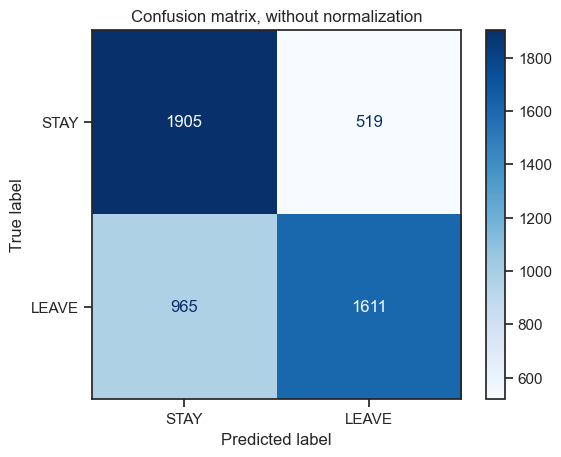

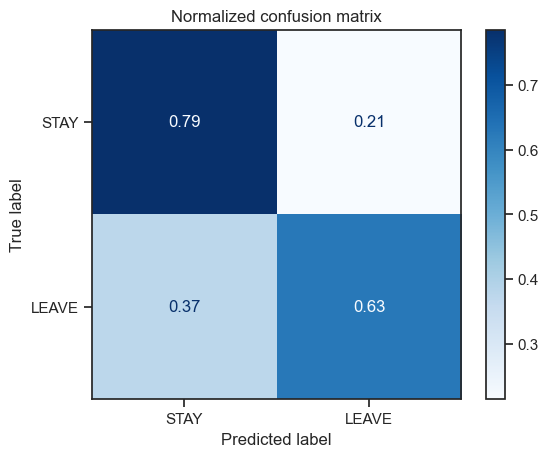

              precision    recall  f1-score   support

        STAY       0.66      0.79      0.72      2424
       LEAVE       0.76      0.63      0.68      2576

    accuracy                           0.70      5000
   macro avg       0.71      0.71      0.70      5000
weighted avg       0.71      0.70      0.70      5000



In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import datasets, metrics, model_selection, svm
import numpy as np

classifier = decision_tree

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=["STAY","LEAVE"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

scores = cross_val_score(decision_tree, X_train, y_train, cv = 10)

print(classification_report(y_test, y_pred, target_names=["STAY","LEAVE"]))



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.762


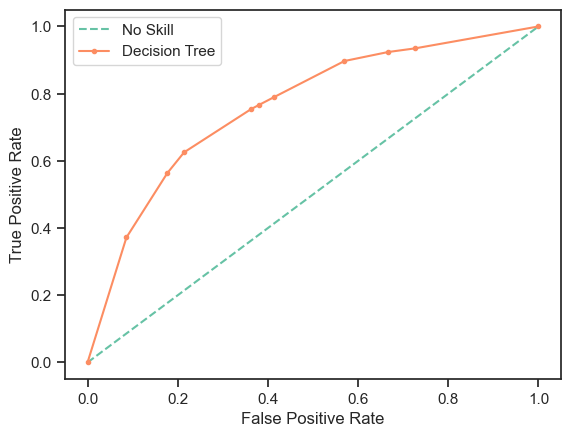

In [13]:
import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

trainX, testX, trainy, testy = X_train, X_test, y_train, y_test

##################################################################################
###   When to use ROC vs Precision-Recall Curve
###   ROC curves should be used when there are roughly equal numbers of observations for each class.
###   Precision-Recall curves should be used when there is a moderate to large class imbalance.
##################################################################################


ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = decision_tree
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()